### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import albumentations as A

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from torchvision import transforms

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training - Augementation 1

In [3]:
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.5),
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_1.pth')

100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 0, Loss: 0.7006178498268127, mIoU: 0.20909362577216767


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 1, Loss: 0.39654240012168884, mIoU: 0.30432243861307595


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 2, Loss: 0.31940048933029175, mIoU: 0.35007018102346166


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 3, Loss: 0.28012973070144653, mIoU: 0.3827121546518778


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 4, Loss: 0.5709856748580933, mIoU: 0.4057775147232185


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 5, Loss: 0.2024514228105545, mIoU: 0.41928901028216603


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 6, Loss: 0.2363322526216507, mIoU: 0.4323880479315147


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 7, Loss: 0.2109125554561615, mIoU: 0.44071156566912156


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 8, Loss: 0.2722752094268799, mIoU: 0.4522685444464048


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 9, Loss: 0.20631945133209229, mIoU: 0.4610309977598522


100%|██████████| 313/313 [02:21<00:00,  2.20it/s]


Epoch: 10, Loss: 0.25483986735343933, mIoU: 0.46717359131782704


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 11, Loss: 0.21834705770015717, mIoU: 0.4772450177112665


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 12, Loss: 0.21944156289100647, mIoU: 0.4851198330120313


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 13, Loss: 0.2297864556312561, mIoU: 0.48915202096807137


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 14, Loss: 0.1887751817703247, mIoU: 0.4978433711715285


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 15, Loss: 0.2830430865287781, mIoU: 0.49789601007653755


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 16, Loss: 0.2815718352794647, mIoU: 0.5034569043678573


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 17, Loss: 0.22933101654052734, mIoU: 0.5105377589727368


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 18, Loss: 0.20627668499946594, mIoU: 0.518623927226496


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 19, Loss: 0.15249700844287872, mIoU: 0.5238318768647477


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 20, Loss: 0.16586551070213318, mIoU: 0.5317152676294489


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 21, Loss: 0.1594497412443161, mIoU: 0.5390695902485046


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 22, Loss: 0.1769586056470871, mIoU: 0.5420586679547663


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 23, Loss: 0.14470311999320984, mIoU: 0.5473005720669079


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 24, Loss: 0.20987975597381592, mIoU: 0.5529602752582671


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 25, Loss: 0.1957828849554062, mIoU: 0.5594704775564231


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 26, Loss: 0.20172350108623505, mIoU: 0.5623865530657395


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 27, Loss: 0.15741066634655, mIoU: 0.5667212679910678


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 28, Loss: 0.18005335330963135, mIoU: 0.5702825822461821


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 29, Loss: 0.17107313871383667, mIoU: 0.5748896304340612


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 30, Loss: 0.1558949053287506, mIoU: 0.5781617251703609


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 31, Loss: 0.1497252881526947, mIoU: 0.5804248669880965


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 32, Loss: 0.20172154903411865, mIoU: 0.5826719536243496


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 33, Loss: 0.16980880498886108, mIoU: 0.5848840765341745


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 34, Loss: 0.15224875509738922, mIoU: 0.5912241995494151


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 35, Loss: 0.15015654265880585, mIoU: 0.5911628613514017


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 36, Loss: 0.17482499778270721, mIoU: 0.595653998459873


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 37, Loss: 0.1689203977584839, mIoU: 0.598466927818405


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 38, Loss: 0.16892679035663605, mIoU: 0.600011640213094


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 39, Loss: 0.17122213542461395, mIoU: 0.6036874655821513


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 40, Loss: 0.17726700007915497, mIoU: 0.6039443886872454


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 41, Loss: 0.1270970106124878, mIoU: 0.6058982576034067


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 42, Loss: 0.14600643515586853, mIoU: 0.6090290794882669


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 43, Loss: 0.189254492521286, mIoU: 0.6133644429600897


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 44, Loss: 0.1501007378101349, mIoU: 0.6125204383891194


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 45, Loss: 0.21742862462997437, mIoU: 0.6132994105667136


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 46, Loss: 0.1908818930387497, mIoU: 0.616131602250493


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 47, Loss: 0.1318473517894745, mIoU: 0.6170519749418201


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 48, Loss: 0.18111446499824524, mIoU: 0.6204329866069771


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]

Epoch: 49, Loss: 0.19032782316207886, mIoU: 0.6228556339690697


### Training - Augementation 2

In [4]:
torch.cuda.empty_cache()

device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomCrop(width=256, height=256, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model

torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_2.pth')

100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 0, Loss: 0.5092978477478027, mIoU: 0.15586839728232982


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 1, Loss: 0.7154426574707031, mIoU: 0.2200586103690767


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 2, Loss: 0.2517665922641754, mIoU: 0.25095406073428683


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 3, Loss: 0.4912794232368469, mIoU: 0.268747751326596


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 4, Loss: 0.24323412775993347, mIoU: 0.27612752955885095


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 5, Loss: 0.23519916832447052, mIoU: 0.29605495132503906


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 6, Loss: 1.6304510831832886, mIoU: 0.30894305853181453


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 7, Loss: 0.7593958377838135, mIoU: 0.32601936123688846


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 8, Loss: 0.19203662872314453, mIoU: 0.33907065363331146


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 9, Loss: 0.334437757730484, mIoU: 0.3376986064748808


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 10, Loss: 0.2250899076461792, mIoU: 0.35262979700881825


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 11, Loss: 0.5115485787391663, mIoU: 0.3556404319639171


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 12, Loss: 0.18719275295734406, mIoU: 0.3627383041702525


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 13, Loss: 0.2590475082397461, mIoU: 0.3800171277161992


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 14, Loss: 0.19106291234493256, mIoU: 0.3917307803836949


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 15, Loss: 0.34898075461387634, mIoU: 0.3801183831963709


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 16, Loss: 0.4458761215209961, mIoU: 0.3876189691367621


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 17, Loss: 0.23999528586864471, mIoU: 0.39760048045703433


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 18, Loss: 0.3282420337200165, mIoU: 0.40802741024052647


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 19, Loss: 0.3510570228099823, mIoU: 0.4127158018343218


100%|██████████| 313/313 [02:07<00:00,  2.46it/s]


Epoch: 20, Loss: 0.13463693857192993, mIoU: 0.4035489334280278


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 21, Loss: 0.22374393045902252, mIoU: 0.4227498723252948


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 22, Loss: 0.2375614047050476, mIoU: 0.43001412883157064


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 23, Loss: 0.18465198576450348, mIoU: 0.4253536188414448


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 24, Loss: 0.27113252878189087, mIoU: 0.4415975479837189


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 25, Loss: 0.3717960715293884, mIoU: 0.42621512009521245


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 26, Loss: 0.30540725588798523, mIoU: 0.45679640850761455


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 27, Loss: 0.14224188029766083, mIoU: 0.4467847331271117


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 28, Loss: 0.27805131673812866, mIoU: 0.43990863824070514


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 29, Loss: 0.2442733198404312, mIoU: 0.44351953951953055


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 30, Loss: 0.33193346858024597, mIoU: 0.4511199399007624


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 31, Loss: 0.1235935240983963, mIoU: 0.45913548088951933


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 32, Loss: 0.31681716442108154, mIoU: 0.46366341018018364


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 33, Loss: 0.13887855410575867, mIoU: 0.45689679385104537


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 34, Loss: 0.3170698881149292, mIoU: 0.4639331730410648


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 35, Loss: 0.2724490761756897, mIoU: 0.4623892248424974


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 36, Loss: 0.12143919616937637, mIoU: 0.4566670291626502


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 37, Loss: 0.23736490309238434, mIoU: 0.46352614461262315


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 38, Loss: 0.11761137843132019, mIoU: 0.46979424251384766


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 39, Loss: 0.3971511423587799, mIoU: 0.47517158357933076


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 40, Loss: 0.4775472581386566, mIoU: 0.4729642610115727


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 41, Loss: 0.4232763648033142, mIoU: 0.47055109308793897


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 42, Loss: 0.2056359499692917, mIoU: 0.4681994709595133


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 43, Loss: 0.2856404483318329, mIoU: 0.47892859649214653


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 44, Loss: 0.7580386400222778, mIoU: 0.4791719667719459


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 45, Loss: 0.24016018211841583, mIoU: 0.4902661976976972


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 46, Loss: 0.1607225388288498, mIoU: 0.4974912066266117


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 47, Loss: 0.6772555112838745, mIoU: 0.4876808063701469


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 48, Loss: 0.2092188149690628, mIoU: 0.4953348872645634


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]

Epoch: 49, Loss: 0.14497999846935272, mIoU: 0.49291604256245686


### Training - Augementation 3 (1+2)

In [5]:
torch.cuda.empty_cache()

device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.5),
    A.RandomCrop(width=256, height=256, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_3.pth')

100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 0, Loss: 0.5420786142349243, mIoU: 0.1462530942554061


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 1, Loss: 0.40380996465682983, mIoU: 0.2049273764612158


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 2, Loss: 0.5277866721153259, mIoU: 0.22160976844527394


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 3, Loss: 0.84261155128479, mIoU: 0.23970721274991025


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 4, Loss: 0.7561421990394592, mIoU: 0.2565511566708773


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 5, Loss: 0.38799384236335754, mIoU: 0.271149271414514


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 6, Loss: 0.660023033618927, mIoU: 0.27975165222993087


100%|██████████| 313/313 [02:10<00:00,  2.41it/s]


Epoch: 7, Loss: 0.3683261573314667, mIoU: 0.2841294765283087


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 8, Loss: 0.35752224922180176, mIoU: 0.30110312761407904


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 9, Loss: 1.949611783027649, mIoU: 0.3047169737722831


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 10, Loss: 0.6455805897712708, mIoU: 0.3148724797657302


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 11, Loss: 0.3862275183200836, mIoU: 0.32450430959864246


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 12, Loss: 0.5389944911003113, mIoU: 0.33993099583918207


100%|██████████| 313/313 [02:10<00:00,  2.40it/s]


Epoch: 13, Loss: 0.263641357421875, mIoU: 0.34824266452347596


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 14, Loss: 0.19680693745613098, mIoU: 0.3384082927399241


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 15, Loss: 0.2921288311481476, mIoU: 0.3426740549622788


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 16, Loss: 1.4544275999069214, mIoU: 0.3528765768744668


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 17, Loss: 0.7502127885818481, mIoU: 0.35488146975741164


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 18, Loss: 0.24254149198532104, mIoU: 0.36676778633374435


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 19, Loss: 1.0056511163711548, mIoU: 0.36542617193902666


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 20, Loss: 0.7236413955688477, mIoU: 0.36399466357557914


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 21, Loss: 0.22594287991523743, mIoU: 0.3715354859187483


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 22, Loss: 0.6158989071846008, mIoU: 0.37857102400317477


100%|██████████| 313/313 [02:12<00:00,  2.36it/s]


Epoch: 23, Loss: 0.5818772315979004, mIoU: 0.37462105483244007


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 24, Loss: 0.21953053772449493, mIoU: 0.3906848364399561


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 25, Loss: 0.2623324990272522, mIoU: 0.38117007094442956


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 26, Loss: 0.5437989830970764, mIoU: 0.3882330345043763


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 27, Loss: 0.26943275332450867, mIoU: 0.3951408279940954


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 28, Loss: 0.37886351346969604, mIoU: 0.3901274652948474


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 29, Loss: 0.14419469237327576, mIoU: 0.3964820300109215


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 30, Loss: 0.21260574460029602, mIoU: 0.4064500465544401


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 31, Loss: 0.688346803188324, mIoU: 0.40485690424557336


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 32, Loss: 0.2432725429534912, mIoU: 0.41719075446760157


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 33, Loss: 0.335356205701828, mIoU: 0.4228971526547577


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 34, Loss: 0.5053116679191589, mIoU: 0.42356612498748464


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 35, Loss: 1.3934940099716187, mIoU: 0.4286688483427675


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 36, Loss: 0.4317677319049835, mIoU: 0.4263813568287046


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 37, Loss: 0.21645864844322205, mIoU: 0.42901176225194176


100%|██████████| 313/313 [02:15<00:00,  2.32it/s]


Epoch: 38, Loss: 0.375394731760025, mIoU: 0.44042798965327457


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 39, Loss: 0.34265637397766113, mIoU: 0.4371777387254471


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 40, Loss: 0.2729453146457672, mIoU: 0.42750444962171036


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 41, Loss: 0.27834242582321167, mIoU: 0.42966941039630413


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 42, Loss: 0.2557159662246704, mIoU: 0.4437424033273248


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 43, Loss: 0.3982795178890228, mIoU: 0.428984344054917


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 44, Loss: 0.3450815975666046, mIoU: 0.4364465372707906


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 45, Loss: 0.11378712952136993, mIoU: 0.451560448493024


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 46, Loss: 0.7683377265930176, mIoU: 0.4450049239339061


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 47, Loss: 0.14194150269031525, mIoU: 0.4449436141793075


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 48, Loss: 0.2432202845811844, mIoU: 0.44178474119281547


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]

Epoch: 49, Loss: 0.11721567064523697, mIoU: 0.4612882349263952


### Training - Augementation 4

In [2]:
torch.cuda.empty_cache()

device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.5),
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_4.pth')

100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 0, Loss: 0.5546475052833557, mIoU: 0.19967999802073233


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 1, Loss: 0.3797212541103363, mIoU: 0.2885928800214072


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 2, Loss: 0.43091610074043274, mIoU: 0.3269859767696564


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 3, Loss: 0.5143005847930908, mIoU: 0.35056980393039844


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 4, Loss: 0.31911158561706543, mIoU: 0.37180671754048256


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 5, Loss: 0.28555169701576233, mIoU: 0.38929721842935794


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 6, Loss: 0.3014644980430603, mIoU: 0.41289210062421955


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 7, Loss: 0.6981187462806702, mIoU: 0.43784582937341376


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 8, Loss: 0.2537957429885864, mIoU: 0.4501233708809211


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 9, Loss: 0.25375688076019287, mIoU: 0.4695242799606931


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 10, Loss: 0.2220638543367386, mIoU: 0.47988048864436766


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 11, Loss: 0.2967703640460968, mIoU: 0.49067536161492886


100%|██████████| 313/313 [02:18<00:00,  2.25it/s]


Epoch: 12, Loss: 0.1436615139245987, mIoU: 0.5044809711435534


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 13, Loss: 0.2287713587284088, mIoU: 0.5103116437997636


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 14, Loss: 0.24052691459655762, mIoU: 0.519523700273579


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 15, Loss: 0.218796968460083, mIoU: 0.5247404341382823


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 16, Loss: 0.220572367310524, mIoU: 0.5327841894229337


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 17, Loss: 0.16734722256660461, mIoU: 0.5406215691382706


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 18, Loss: 0.2633732259273529, mIoU: 0.544721731644576


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 19, Loss: 0.15569332242012024, mIoU: 0.5540857650092624


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 20, Loss: 0.17788690328598022, mIoU: 0.5640547792705073


100%|██████████| 313/313 [02:21<00:00,  2.20it/s]


Epoch: 21, Loss: 0.18203599750995636, mIoU: 0.56603922711955


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 22, Loss: 0.22464098036289215, mIoU: 0.5697427303070538


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 23, Loss: 0.21657411754131317, mIoU: 0.5751988868652949


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 24, Loss: 0.1877676099538803, mIoU: 0.5796333758912251


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 25, Loss: 0.32200494408607483, mIoU: 0.5832127849551519


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 26, Loss: 0.18567971885204315, mIoU: 0.5839067315873272


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 27, Loss: 0.18203040957450867, mIoU: 0.5934928372447101


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 28, Loss: 0.1904398649930954, mIoU: 0.594201063621339


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 29, Loss: 0.31556516885757446, mIoU: 0.5967513934253287


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 30, Loss: 0.20581430196762085, mIoU: 0.5990239354214796


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 31, Loss: 0.23518842458724976, mIoU: 0.6020117327761877


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 32, Loss: 0.16884006559848785, mIoU: 0.6100572169018817


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 33, Loss: 0.21903418004512787, mIoU: 0.6065995315057293


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 34, Loss: 0.16626238822937012, mIoU: 0.6100385328240757


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 35, Loss: 0.18084187805652618, mIoU: 0.6169357251201208


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 36, Loss: 0.17487038671970367, mIoU: 0.6141024345174239


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 37, Loss: 0.15505529940128326, mIoU: 0.6158774022275876


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 38, Loss: 0.16422642767429352, mIoU: 0.620369935117537


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 39, Loss: 0.1317492425441742, mIoU: 0.6205131779858329


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 40, Loss: 0.1854918748140335, mIoU: 0.6264245234012232


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 41, Loss: 0.15354932844638824, mIoU: 0.6278050456669794


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 42, Loss: 0.1482733190059662, mIoU: 0.6287654193108686


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 43, Loss: 0.15233826637268066, mIoU: 0.63308860029428


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 44, Loss: 0.2159287929534912, mIoU: 0.6299473356224087


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 45, Loss: 0.13959017395973206, mIoU: 0.6343315764233091


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 46, Loss: 0.24348366260528564, mIoU: 0.6363212238057173


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 47, Loss: 0.15096639096736908, mIoU: 0.6370073771894935


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 48, Loss: 0.13452954590320587, mIoU: 0.639078819196023


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]

Epoch: 49, Loss: 0.1599474847316742, mIoU: 0.6394072241705233


### Evaluation - GTA 5

0it [00:01, ?it/s]


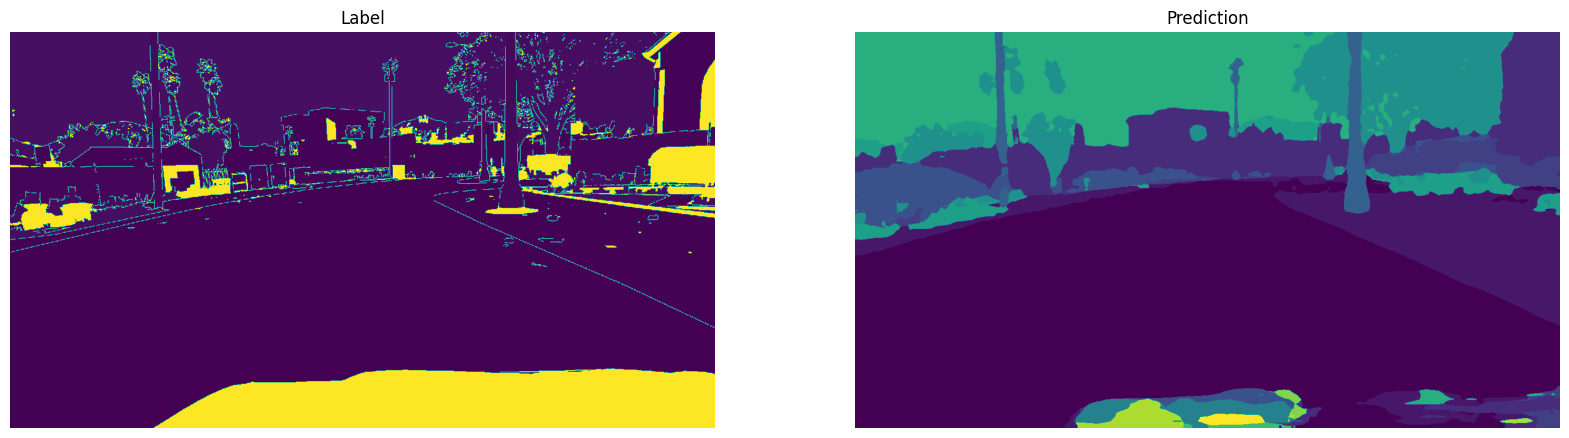

In [3]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_1.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation (CityScapes) - Augementation 1

In [2]:
# These are the class labels for the Cityscapes dataset
class_labels = {
    0: 'road',
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle'
}

In [4]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_1.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 79.62it/s]

Mean IoU: 0.2339 

road IoU: 0.5859
sidewalk IoU: 0.1254
building IoU: 0.6583
wall IoU: 0.1296
fence IoU: 0.1183
pole IoU: 0.1469
traffic light IoU: 0.1007
traffic sign IoU: 0.0467
vegetation IoU: 0.7493
terrain IoU: 0.1821
sky IoU: 0.5927
person IoU: 0.3822
rider IoU: 0.0000
car IoU: 0.3724
truck IoU: 0.0769
bus IoU: 0.0504
train IoU: 0.0864
motorcycle IoU: 0.0399
bicycle IoU: 0.0000


### Evaluation (CityScapes) - Augementation 2

In [5]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_2.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 79.24it/s]

Mean IoU: 0.2332 

road IoU: 0.4738
sidewalk IoU: 0.1715
building IoU: 0.5145
wall IoU: 0.1708
fence IoU: 0.1136
pole IoU: 0.1236
traffic light IoU: 0.0744
traffic sign IoU: 0.0595
vegetation IoU: 0.7485
terrain IoU: 0.2226
sky IoU: 0.7418
person IoU: 0.3571
rider IoU: 0.0000
car IoU: 0.5397
truck IoU: 0.0275
bus IoU: 0.0926
train IoU: 0.0000
motorcycle IoU: 0.0000
bicycle IoU: 0.0000


### Evaluation (CityScapes) - Augementation 3

In [6]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_3.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 80.19it/s]

Mean IoU: 0.2473 

road IoU: 0.6580
sidewalk IoU: 0.1519
building IoU: 0.5906
wall IoU: 0.1738
fence IoU: 0.1153
pole IoU: 0.1111
traffic light IoU: 0.0143
traffic sign IoU: 0.0458
vegetation IoU: 0.7399
terrain IoU: 0.2813
sky IoU: 0.6772
person IoU: 0.3413
rider IoU: 0.0000
car IoU: 0.5882
truck IoU: 0.0885
bus IoU: 0.0611
train IoU: 0.0425
motorcycle IoU: 0.0185
bicycle IoU: 0.0000


### Evaluation (CityScapes) - Augementation 4

In [7]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_4.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 79.60it/s]

Mean IoU: 0.2618 

road IoU: 0.6468
sidewalk IoU: 0.2407
building IoU: 0.6170
wall IoU: 0.2029
fence IoU: 0.1680
pole IoU: 0.1471
traffic light IoU: 0.0860
traffic sign IoU: 0.0700
vegetation IoU: 0.7577
terrain IoU: 0.2652
sky IoU: 0.6080
person IoU: 0.3857
rider IoU: 0.0853
car IoU: 0.4756
truck IoU: 0.1195
bus IoU: 0.0409
train IoU: 0.0356
motorcycle IoU: 0.0230
bicycle IoU: 0.0000


### Example

0it [00:00, ?it/s]


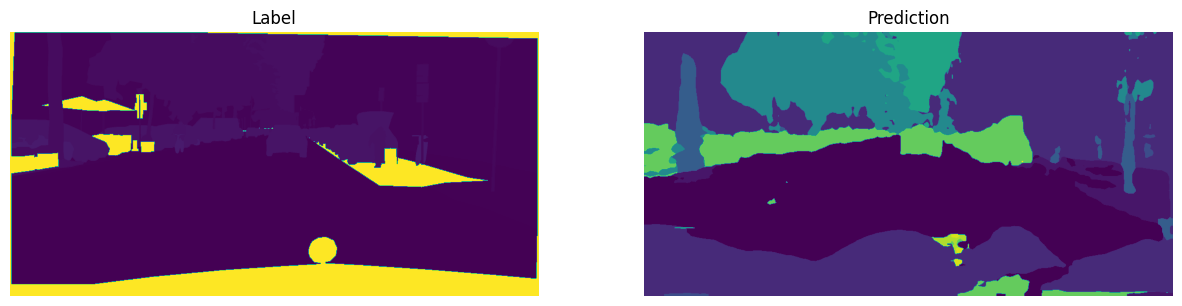

In [16]:
## Inference
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_4.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()